# DataJam 2022 - QGis Warriors
Integrantes
- Jácome José
- Parra Karen
- Vasco Danny

## Tipo de reto
Reto #1 - Dateando por el agua

## Descripción
Este Jupyter Notebook está dirigido a visualizar los datos filtrados que se entregaron como parte de los datos del concurso

## Objetivo
- Visualizar regiones, provincias, cantones y parroquias con mayor presencia de autorizaciones para el uso del agua. 
- Visualizar crecimiento poblacional de regiones candidatas (TODO)

## Instrucciones
- Descargar los datos del Reto 1 y descomprimir en la carpeta `Reto1` de esta repositorio, los datos del Reto 1 estan en el siguiente [link de descarga ](
https://drive.google.com/drive/folders/1NnBdtYvd4XdZ8e349c6PDfByzIyvaAZ6?usp=sharing
)

## Sección de Carga de Librerías y Constantes

In [27]:
import pandas as pd
import numpy as np
import os
RUTA_RECURSO_HIDRICO_FILTRADO = "Reto1/Autorizaciones del Recurso Hídrico_filtrado.xlsx"
RUTA_PROYECCION_POBLACIONAL = "Reto1/Proyección Poblacional cantonal 2010-2020.xlsx"

In [28]:
df_proyeccion_cantonal = pd.read_excel(RUTA_PROYECCION_POBLACIONAL, header=2) # Header 2, cargar a partir de la segunda fila
df_recurso_hidrico_base_datos_filtrado = pd.read_excel(RUTA_RECURSO_HIDRICO_FILTRADO)

## Gráfico de frecuencia por autorizaciones del Recurso Hídrico por Region

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Region'}>

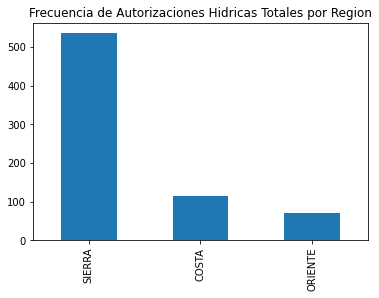

In [29]:
NOMBRE_COLUMNA = "REGION_FUENTE"
df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Totales por Region")

## Gráfico de frecuencia por autorizaciones del Recurso Hídrico por Provincia

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Provincia'}>

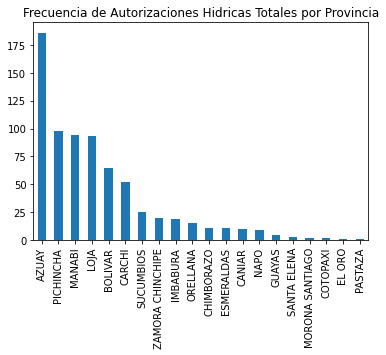

In [30]:
NOMBRE_COLUMNA = "PROVINCIA_FUENTE"
df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Totales por Provincia")

## Grafico de por Cantón

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Cantón'}>

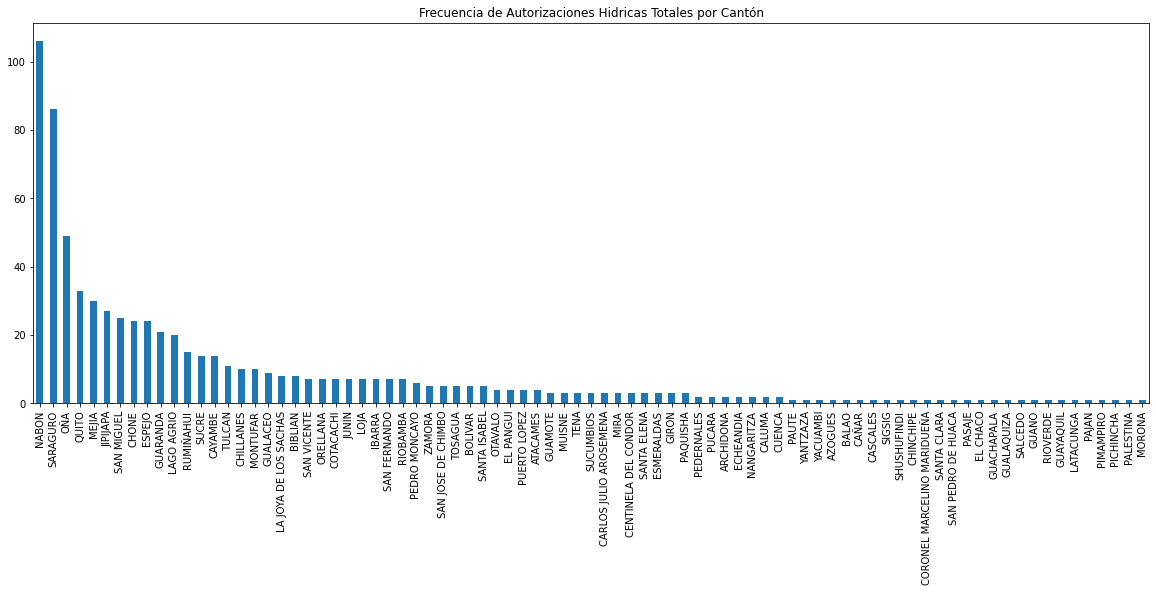

In [31]:
NOMBRE_COLUMNA = "CANTON_FUENTE"
df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Totales por Cantón", figsize=(20, 7))

## Grafico por Parroquia

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Parroquia'}>

/home/josejacomeb/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/josejacomeb/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0, flags=flags)


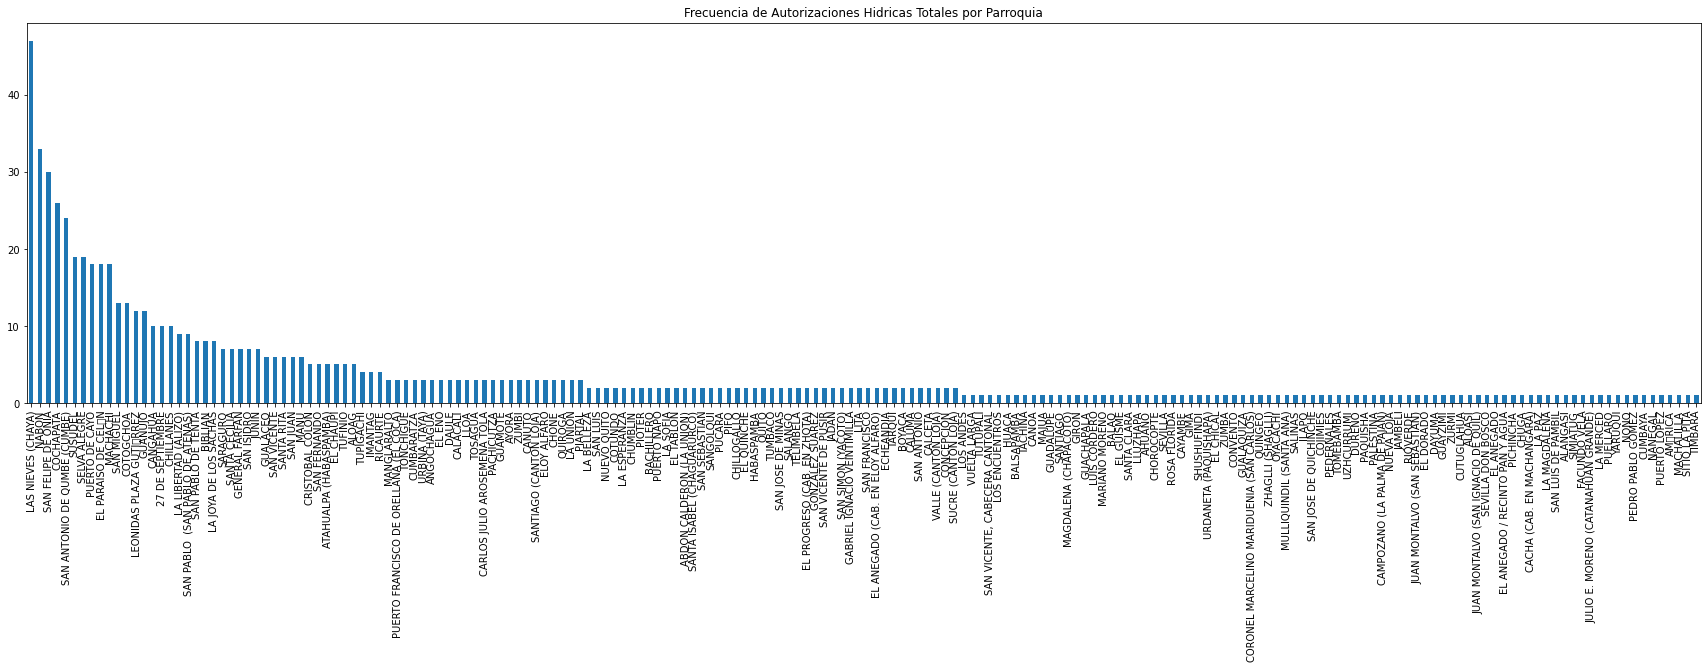

In [32]:
NOMBRE_COLUMNA = "PARROQUIA_FUENTE"
df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Totales por Parroquia", figsize=(30, 7))

## Gráficos de Autorizaciones Vigentes
### Gráficos por Regiones

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Regiones'}>

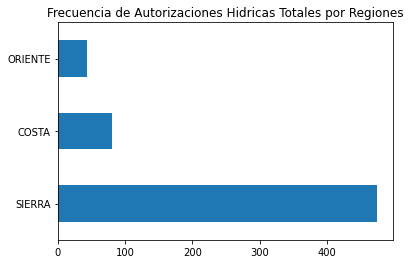

In [33]:
NOMBRE_COLUMNA_TRAMITE = "ESTADO_TRAMITE"
df_recurso_hidrico_base_datos_estado_vigente = df_recurso_hidrico_base_datos_filtrado[df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA_TRAMITE] == "VIGENTE"]
NOMBRE_COLUMNA = "REGION_FUENTE"
df_recurso_hidrico_base_datos_estado_vigente[NOMBRE_COLUMNA].value_counts().plot.barh(title="Frecuencia de Autorizaciones Hidricas Totales por Regiones")

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Provincias'}>

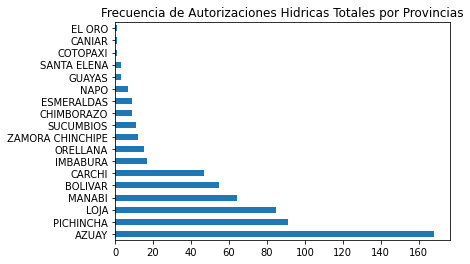

In [34]:
NOMBRE_COLUMNA = "PROVINCIA_FUENTE"
df_recurso_hidrico_base_datos_estado_vigente[NOMBRE_COLUMNA].value_counts().plot.barh(title="Frecuencia de Autorizaciones Hidricas Totales por Provincias")

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Provincias'}>

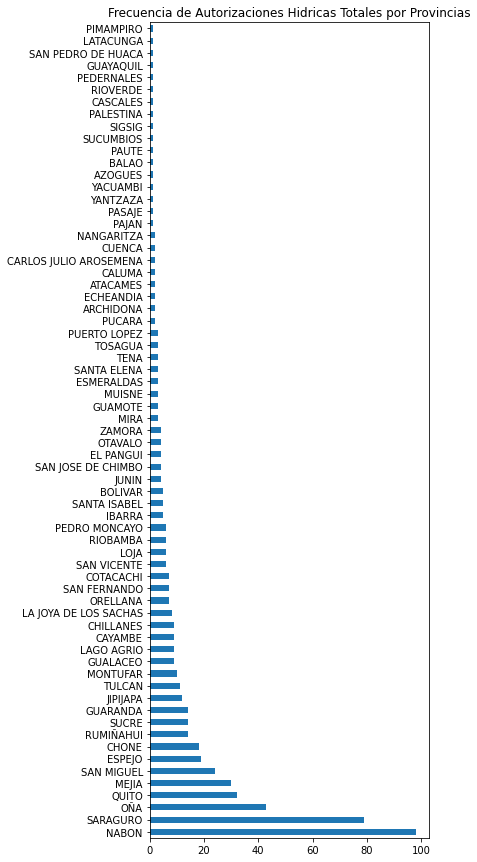

In [39]:
NOMBRE_COLUMNA = "CANTON_FUENTE"
df_recurso_hidrico_base_datos_estado_vigente[NOMBRE_COLUMNA].value_counts().plot.barh(
    title="Frecuencia de Autorizaciones Hidricas Totales por Provincias",
    figsize=(5, 15)
)

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Provincias'}>

/home/josejacomeb/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/josejacomeb/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0, flags=flags)


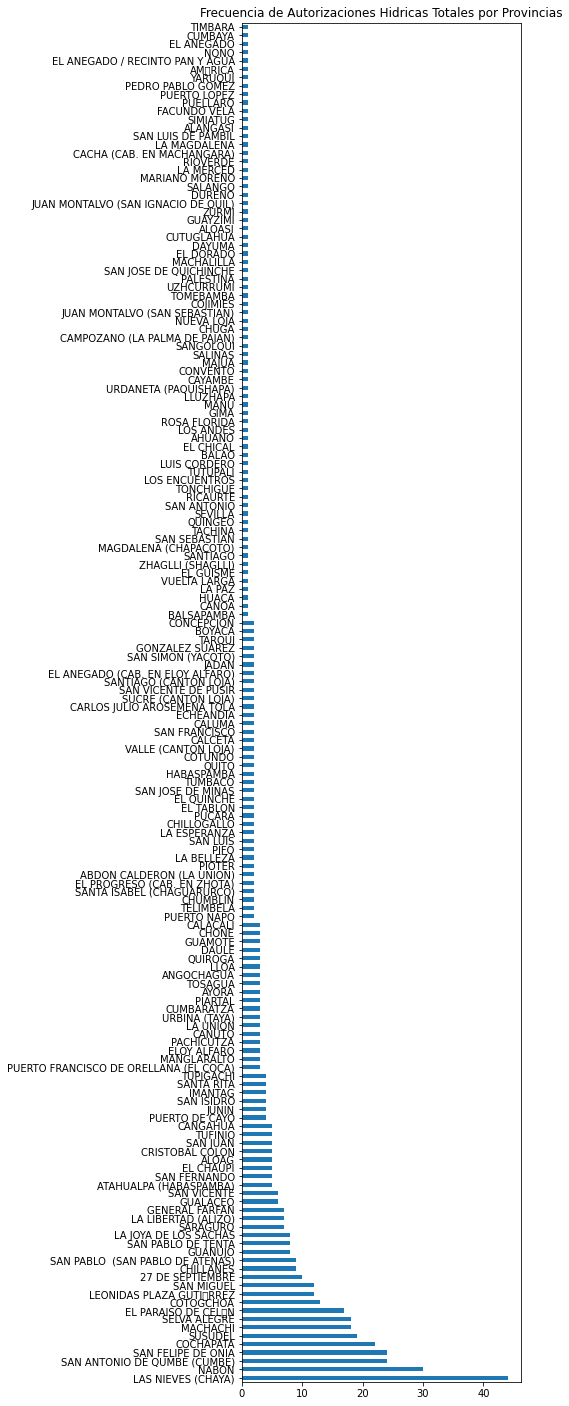

In [42]:
NOMBRE_COLUMNA = "PARROQUIA_FUENTE"
df_recurso_hidrico_base_datos_estado_vigente[NOMBRE_COLUMNA].value_counts().plot.barh(
    title="Frecuencia de Autorizaciones Hidricas Totales por Provincias",
    figsize=(5, 25)
)

## Buscar el los cantones en que la población aumenta o disminuye

In [ ]:
NOMBRE_COLUMNA_CANTONES = "ABC"